<a href="https://colab.research.google.com/github/KrisNguyen135/Deep-Learning-with-Google-Colab/blob/master/notebooks/Recognizing_fashion_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch; torch.manual_seed(0)
import torchvision

import numpy as np
import matplotlib.pyplot as plt
import random; random.seed(0)

from sklearn.metrics import classification_report
import math

In [0]:
if torch.cuda.is_available():
    print('CUDA is available. Using the GPU.')
    device = torch.device('cuda')
else:
    print('CUDA is not available. Using the CPU.')
    device = torch.device('cpu')

CUDA is available. Using the GPU.


In [0]:
train_dataset = torchvision.datasets.FashionMNIST(
    './train',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

val_dataset = torchvision.datasets.FashionMNIST(
    './val',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

0it [00:00, ?it/s]

26427392it [00:01, 13735396.94it/s]                             


Extracting ./train/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 95431.66it/s]                            
0it [00:00, ?it/s]

Extracting ./train/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 3989222.05it/s]                             
0it [00:00, ?it/s]

Extracting ./train/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 30485.25it/s]            
0it [00:00, ?it/s]

Extracting ./train/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


26427392it [00:01, 13664896.49it/s]                              


Extracting ./val/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 96260.39it/s]                            
0it [00:00, ?it/s]

Extracting ./val/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4063764.49it/s]                             
0it [00:00, ?it/s]

Extracting ./val/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 33638.17it/s]            

Extracting ./val/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
batch_size = 128  # to be changed to 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

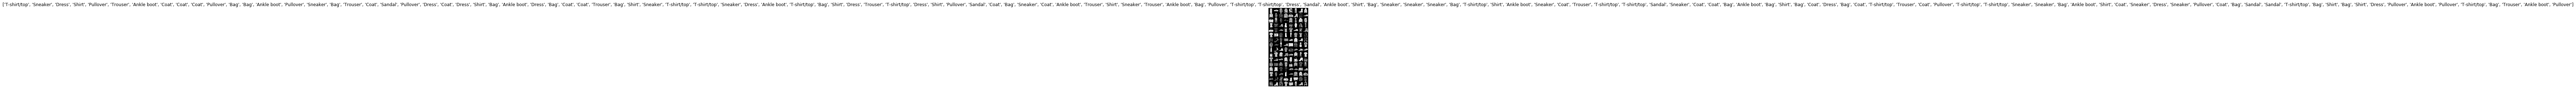

In [0]:
for images, labels in train_loader:
    grid = torchvision.utils.make_grid(images)
    
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    
    # Print out actual labels instead of label indices.
    #plt.title(labels.numpy())  # label indices
    plt.title([train_dataset.classes[label] for label in labels.numpy()])
    
    plt.axis('off')
    
    plt.show()
    
    break

In [0]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [0]:
class DoubleLayerNet(torch.nn.Module):
    def __init__(self, hidden_size1, hidden_size2):
        super(DoubleLayerNet, self).__init__()
        self.hidden1 = torch.nn.Linear(28 * 28, hidden_size1)
        self.relu1 = torch.nn.ReLU()
        self.hidden2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(hidden_size2, 10)
        
    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu1(out)
        out = self.hidden2(out)
        out = self.relu2(out)
        out = self.output(out)
        
        return out

In [0]:
n_epochs = 10
learning_rate = 0.0001

model = DoubleLayerNet(128, 128).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
losses = []

model.train()

for epoch in range(n_epochs):
    running_loss = 0
    
    for images, labels in train_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        output = model(images)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
    losses.append(running_loss / len(train_loader))
    
    print(f'Epoch {epoch + 1}/{n_epochs}: {losses[-1]:.4f}')

Epoch 1/10: 139.2133
Epoch 2/10: 75.0887
Epoch 3/10: 64.7159
Epoch 4/10: 59.7242
Epoch 5/10: 56.7387
Epoch 6/10: 54.5373
Epoch 7/10: 52.8157
Epoch 8/10: 51.5552
Epoch 9/10: 50.4196
Epoch 10/10: 49.3879


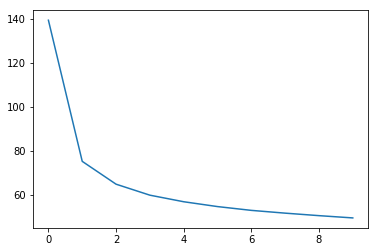

In [0]:
plt.plot(losses)
plt.show()

In [0]:
model.eval()

with torch.no_grad():
    y_true = []
    y_pred = []
    
    for images, labels in val_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        output = model(images)
        _, preds = torch.max(output.data, 1)
        
        y_true += list(labels.cpu().numpy())
        y_pred += list(preds.cpu().numpy())
        
    print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.86      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.69      0.82      0.75      1000
       Dress       0.83      0.87      0.85      1000
        Coat       0.80      0.66      0.72      1000
      Sandal       0.95      0.95      0.95      1000
       Shirt       0.67      0.57      0.62      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [0]:
class ConvNet(torch.nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(1, 16, 3, padding=1)
        torch.nn.init.xavier_uniform_(self.conv1.weight)
        self.pooling1 = torch.nn.MaxPool2d(2)
        self.relu1 = torch.nn.ReLU()
        
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        torch.nn.init.xavier_uniform_(self.conv2.weight)
        self.pooling2 = torch.nn.MaxPool2d(2)
        self.relu2 = torch.nn.ReLU()
        
        self.output = torch.nn.Linear(1568, 10)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.pooling1(out)
        out = self.relu1(out)
        
        out = self.conv2(out)
        out = self.pooling2(out)
        out = self.relu2(out)
        
        out = out.view(out.size(0), -1)
        out = self.output(out)
        
        return out

In [0]:
n_epochs = 16

model = ConvNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
losses = []

model.train()

for epoch in range(n_epochs):
    running_loss = 0
    
    for images, labels in train_loader:
        images = images.to(device)  # no reshaping
        labels = labels.to(device)
        
        output = model(images)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
    losses.append(running_loss / len(train_loader))
    
    print(f'Epoch {epoch + 1}/{n_epochs}: {losses[-1]:.4f}')

Epoch 1/16: 157.1469
Epoch 2/16: 83.7064
Epoch 3/16: 72.3776
Epoch 4/16: 65.8992
Epoch 5/16: 61.6656
Epoch 6/16: 58.6192
Epoch 7/16: 56.1000
Epoch 8/16: 54.1668
Epoch 9/16: 52.5234
Epoch 10/16: 51.0672
Epoch 11/16: 49.9345
Epoch 12/16: 48.9391
Epoch 13/16: 48.0639
Epoch 14/16: 47.1443
Epoch 15/16: 46.4817
Epoch 16/16: 45.6585


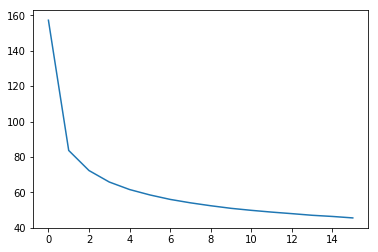

In [0]:
plt.plot(losses)
plt.show()

In [0]:
model.eval()

with torch.no_grad():
    y_true = []
    y_pred = []
    
    for images, labels in val_loader:
        images = images.to(device)  # no reshaping
        labels = labels.to(device)
        
        output = model(images)
        _, preds = torch.max(output.data, 1)
        
        y_true += list(labels.cpu().numpy())
        y_pred += list(preds.cpu().numpy())
        
    print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.78      0.79      1000
       Dress       0.85      0.89      0.87      1000
        Coat       0.76      0.78      0.77      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.65      0.62      0.64      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.94      0.97      0.96      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [0]:
class BasicBlock(torch.nn.Module):
    expansion = 1
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = torch.nn.Conv2d(inplanes, planes, kernel_size=3,
                                    stride=stride, padding=1, bias=False)
        self.bn1 = torch.nn.BatchNorm2d(planes)
        self.relu = torch.nn.ReLU(inplace=True)
        
        self.conv2 = torch.nn.Conv2d(planes, planes, kernel_size=3,
                                     stride=1, padding=1, bias=False)
        self.bn2 = torch.nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
    
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
        
        out += residual
        out = self.relu(out)
        
        return out

In [0]:
class Bottleneck(torch.nn.Module):
    expansion = 4
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = torch.nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = torch.nn.BatchNorm2d(planes)

        self.conv2 = torch.nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                                     padding=1, bias=False)
        self.bn2 = torch.nn.BatchNorm2d(planes)

        self.conv3 = torch.nn.Conv2d(planes, planes*4, kernel_size=1, bias=False)
        self.bn3 = torch.nn.BatchNorm2d(planes*4)

        self.relu = torch.nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

In [0]:
class ResNet(torch.nn.Module):
    def __init__(self, block, layers, num_classes=10):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1,
                                     bias=False)
        self.bn1 = torch.nn.BatchNorm2d(64)
        self.relu = torch.nn.ReLU(inplace=True)
        
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        
        self.avgpool = torch.nn.AvgPool2d(7)
        self.fc = torch.nn.Linear(256 * block.expansion, num_classes)
        
        for m in self.modules():
            if isinstance(m, torch.nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, torch.nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
    
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = torch.nn.Sequential(
                torch.nn.Conv2d(self.inplanes, planes * block.expansion,
                                kernel_size=1, stride=stride, bias=False),
                torch.nn.BatchNorm2d(planes*block.expansion)
            )
            
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        
        return torch.nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x

In [0]:
n_epochs = 10

model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)  # resnet 18
#model = ResNet(BasicBlock, [3, 4, 6, 3]).to(device)  # resnet 34
#model = ResNet(Bottleneck, [3, 4, 6, 3]).to(device)  # resnet 50
#model = ResNet(Bottleneck, [3, 4, 23, 3]).to(device)  # resnet 101
#model = ResNet(Bottleneck, [3, 8, 26, 3]).to(device)  # resnet 152

#model = torchvision.models.resnet18(pretrained=False)  # pre-implemented from torchvision

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
losses = []

model.train()

for epoch in range(n_epochs):
    running_loss = 0
    
    for images, labels in train_loader:
        images = images.to(device)  # no reshaping
        labels = labels.to(device)
        
        output = model(images)
        loss = criterion(output, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
    losses.append(running_loss / len(train_loader))
    
    print(f'Epoch {epoch + 1}/{n_epochs}: {losses[-1]:.4f}')

Epoch 1/10: 68.8405
Epoch 2/10: 36.2596
Epoch 3/10: 28.7467
Epoch 4/10: 22.6858
Epoch 5/10: 17.5571
Epoch 6/10: 12.9039
Epoch 7/10: 9.1889
Epoch 8/10: 6.4147
Epoch 9/10: 4.9704
Epoch 10/10: 3.7776


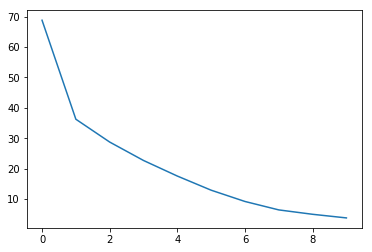

In [0]:
plt.plot(losses)
plt.show()

In [0]:
model.eval()

with torch.no_grad():
    y_true = []
    y_pred = []
    
    for images, labels in val_loader:
        images = images.to(device)  # no reshaping
        labels = labels.to(device)
        
        output = model(images)
        _, preds = torch.max(output.data, 1)
        
        y_true += list(labels.cpu().numpy())
        y_pred += list(preds.cpu().numpy())
        
    print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.88      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.89      0.88      1000
       Dress       0.94      0.87      0.90      1000
        Coat       0.88      0.80      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.72      0.79      0.76      1000
     Sneaker       0.97      0.92      0.94      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

